1. 수업 시간에 만들었던 df3 데이터를 이용해 아래와 같은 분석을 하고자 한다. 최근성(Recency_int와)가 가장 높은 상위 10% 고객들의 성비와 평균 나이를 계산하시오.
2. 금액(Monetary)이 높은 1000명의 데이터를 추출하여, '사업자구분'에서 '개인'과 '사업자'간 주기성(Frequency)의 평균의 차이가 있는지 검정하시오.
3. 최근성(Recency_int와)과 금액(Monetary)간의 상관성을 확인하고자 한다. 성별에 따른 최근성과 금액의 산점도를 시각화 하고, 최근성과 금액 간 상관성이 있는지 가설 검정을 수행하시오.
4. '유입경로'의 빈도수가 가장 높은 항목에 대해 Recency_int와 Frequency, Monetary의 기술 통계량을 계산하시오.
5. 회원가입일과 최종접속일 데이터를 이용해 '접속기간'이라는 파생 변수를 생성하고, '접속기간'이 가장 오래된 100명의 고객 명단을 뽑아 result_vip_member.xlsx로 저장하시오.

In [110]:
import pandas as pd
df=pd.read_csv(r"C:\Users\hanjw\Desktop\python\실습파일\11_Data.csv")

In [28]:
df2= df.sort_values("Recency", ascending= False).head(round(len(df)*0.1))
#평균나이
df3= df2.pivot_table(index= '성별', values= '나이')

,나이
성별,
남자,40.047619
여자,37.000000


In [49]:
#성비 
a= df2['성별'].value_counts()
b=a[0]/a[1]
print (f"남:여 = {b}:1")
a

남:여 = 13.588235294117647:1


남자    462
여자     34
Name: 성별, dtype: int64

금액(Monetary)이 높은 1000명의 데이터를 추출하여, '사업자구분'에서 '개인'과 '사업자'간 주기성(Frequency)의 대표값의 차이가 있는지 검정하시오.

In [67]:
money=df.sort_values('Monetary',ascending= False).head(10000)
#1. 정규 분포를 따르는가?
import scipy.stats as stats
a= money[money['사업자구분']=='사업자']['Frequency']
b= money[money['사업자구분']=='개인']['Frequency']
print(stats.normaltest(a))
print(stats.normaltest(b))
#둘 다 정규 분포를 따르지 않는다. 따라서 비모수검정 시행
#귀무가설 : 동일하다고 볼 수 있다.
stats.ranksums(a,b) # 대표값이 동일하다고 볼 수 있다

NormaltestResult(statistic=5772.584990721993, pvalue=0.0)
NormaltestResult(statistic=3611.533616548878, pvalue=0.0)


RanksumsResult(statistic=-1.792911857268217, pvalue=0.07298701907935906)

최근성(Recency_int와)과 금액(Monetary)간의 상관성을 확인하고자 한다. 성별에 따른 최근성과 금액의 산점도를 시각화 하고, 최근성과 금액 간 상관성이 있는지 가설 검정을 수행하시오.

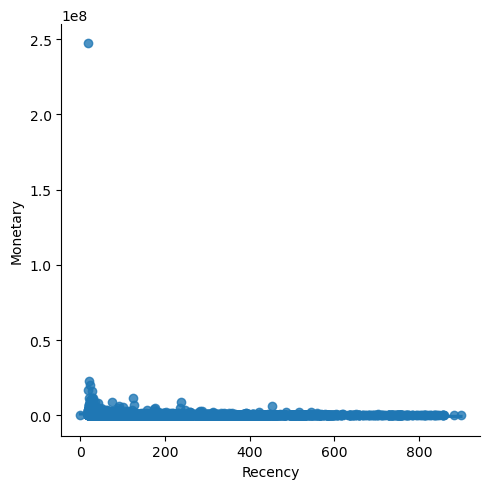

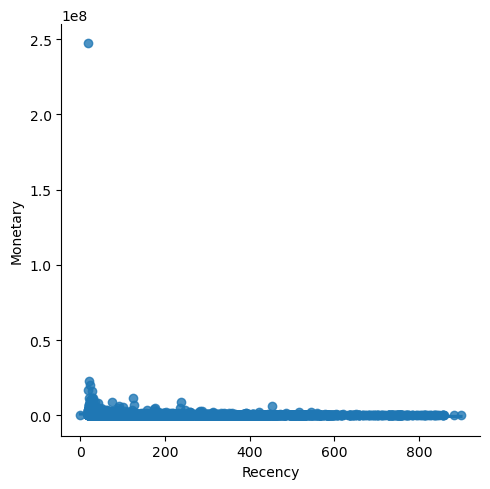

In [82]:
man= df[df["성별"]=="남자"]

sns.lmplot(data= man, x = "Recency", y="Monetary") 
plt.show()

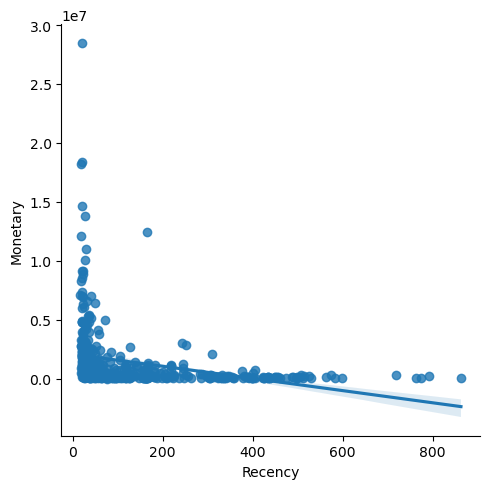

In [92]:
woman= df[df["성별"]=="여자"]
sns.lmplot(data= woman, x = "Recency", y="Monetary") 
plt.show()

In [100]:
# 최근성과 금액 간 상관성이 있는지 가설 검정을 수행하시오.

print(stats.normaltest(df['Recency']))
print(stats.normaltest(df['Monetary'])) # 둘다 정규성을 따르지 않는다-> 스피어만
stats.spearmanr(df['Recency'],df['Monetary']) # 귀무가설: 상관성이 없다고 볼 수 없다
#귀무가설이 채택되지 않았으므로 상관성이 있다고 볼 수 있고,음의 상관정도를 보인다. 

NormaltestResult(statistic=1003.4450089983651, pvalue=1.2725792844076955e-218)
NormaltestResult(statistic=16457.520901727985, pvalue=0.0)


SpearmanrResult(correlation=-0.4298024776364492, pvalue=4.6761525865335465e-222)

유입경로'의 빈도수가 가장 높은 항목에 대해 Recency_int와 Frequency, Monetary의 기술 통계량을 계산하시오.

In [108]:
df['유입경로'].value_counts()# 블로그 광고가 제일 높음
print(df[df['유입경로']=='블로그광고']['Frequency'].describe())
print(df[df['유입경로']=='블로그광고']['Monetary'].describe())
print(df[df['유입경로']=='블로그광고']['Recency'].describe())

count    952.000000
mean      13.600840
std       25.226343
min        1.000000
25%        2.000000
50%        5.000000
75%       14.000000
max      295.000000
Name: Frequency, dtype: float64
count    9.520000e+02
mean     9.576875e+05
std      1.953218e+06
min      0.000000e+00
25%      1.258850e+05
50%      3.425350e+05
75%      8.921725e+05
max      2.293101e+07
Name: Monetary, dtype: float64
count    952.000000
mean     113.576681
std      122.263297
min        0.000000
25%       35.000000
50%       72.000000
75%      142.000000
max      856.000000
Name: Recency, dtype: float64


회원가입일과 최종접속일 데이터를 이용해 '접속기간'이라는 파생 변수를 생성하고, '접속기간'이 가장 오래된 100명의 고객 명단을 뽑아 result_vip_member.xlsx로 저장하시오.
import pandas as pd

In [116]:
df['최종접속일']= df['최종접속일'].str.split().str[0]

In [123]:
df['최종접속일']=pd.to_datetime(df['최종접속일'])
df['회원 가입일']=pd.to_datetime(df['회원 가입일'])


In [131]:
df['접속기간']=df["최종접속일"]-df['회원 가입일']
df.sort_values("접속기간", ascending= False).head(100).to_excel("result_vip_member.xlsx")
